<h1>PAD Lab Experiment 4</h1>

<h2>Roshan Srivastava <br> J047<br>MBA Tech. EXTC SEM 7</h2>

<h3>Aim: To apply PCA before SVM Classifier</h3>

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA as pc
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
faces = fetch_lfw_people(min_faces_per_person = 60)

print(faces.target_names)

print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


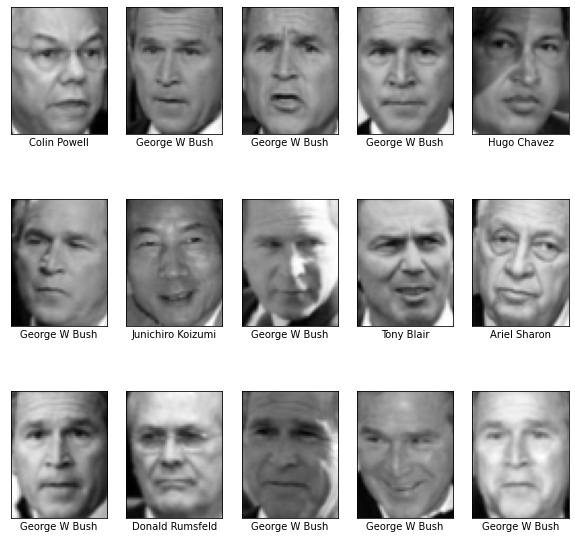

In [9]:
fig, ax = plt.subplots(3,5,figsize=(10,10))

for i,j in enumerate(ax.flat):
  j.imshow(faces.images[i], cmap = 'gray')
  j.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

In [5]:
pca = pc(n_components = 150, whiten = 'True', random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

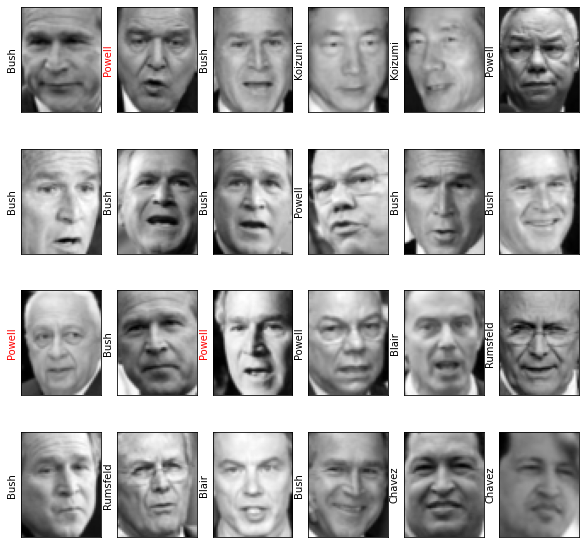

In [11]:
fig, ax = plt.subplots(4,6,figsize=(10,10))
for i,j in enumerate(ax.flat):
  j.imshow(Xtest[i].reshape(62,47), cmap = 'gray')
  j.set(xticks = [], yticks = [])
  j.set_ylabel(faces.target_names[y_pred[i]].split()[-1], color='black' if y_pred[i] == ytest[i] else 'red')

In [8]:
print(classification_report(ytest, y_pred, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        15
     Colin Powell       0.64      0.94      0.76        68
  Donald Rumsfeld       0.93      0.81      0.86        31
    George W Bush       0.92      0.86      0.89       126
Gerhard Schroeder       0.89      0.70      0.78        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.75      0.86        12
       Tony Blair       0.88      0.90      0.89        42

         accuracy                           0.84       337
        macro avg       0.91      0.78      0.83       337
     weighted avg       0.87      0.84      0.84       337



<h1>Conclusion</h1>
<ol>
<li>
From the given LFW dataset, 1348 samples are used to train the model. Before training the model, PCA is used to reduce the dimensions of the given dataset to 150. For SVM, radial base function (rbf) is used as a kernel.
</li>
<li>
For the given dataset, SVM provides 84% accuracy.
</ol>